# First Assignment

# Part 1:
Import libraries and init csv data

In [ ]:
#imports
import pandas as pd
import numpy as np

#data visualizations

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Load dataset from CSV on Google Drive

In [ ]:
dtf = pd.read_csv("/content/drive/My Drive/ColabNotebooks/adc.csv", index_col='id')

In [ ]:
cols = ["FL_DATE", "AIRLINE", "AIRLINE_DOT", "AIRLINE_CODE", "DOT_CODE", "FL_NUMBER", "ORIGIN", "ORIGIN_CITY", "DEST", "DEST_CITY", "CRS_DEP_TIME", "DEP_TIME", "DEP_DELAY", "TAXI_OUT", "WHEELS_OFF", "WHEELS_ON", "TAXI_IN", "CRS_ARR_TIME", "ARR_TIME", "ARR_DELAY", "CANCELLED", "CANCELLATION_CODE", "DIVERTED", "CRS_ELAPSED_TIME", "ELAPSED_TIME", "AIR_TIME", "DISTANCE", "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS", "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"]
dtf = dtf[cols]

In [ ]:
dtf.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
id,,,,,,,,,,,,,,,,,,,,,
1,01/09/2019,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0,186.0,176.0,153.0,1065,NaN,NaN,NaN,NaN,NaN
2,11/19/2022,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0,235.0,236.0,189.0,1399,NaN,NaN,NaN,NaN,NaN
3,7/22/2022,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0,118.0,112.0,87.0,680,NaN,NaN,NaN,NaN,NaN
4,03/06/2023,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0,260.0,285.0,249.0,1589,0.0,0.0,24.0,0.0,0.0
5,2/23/2020,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0,181.0,182.0,153.0,985,NaN,NaN,NaN,NaN,NaN


In [ ]:
dtf.describe()

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,1.048575e+06,1.048575e+06,1.048575e+06,1.021527e+06,1.021518e+06,1.021103e+06,1.021103e+06,1.020709e+06,1.020709e+06,1.048575e+06,...,1.048575e+06,1.048568e+06,1.018570e+06,1.018570e+06,1.048575e+06,187272.000000,187272.000000,187272.000000,187272.000000,187272.000000
mean,1.997643e+04,2.511431e+03,1.327044e+03,1.329752e+03,1.012276e+01,1.664025e+01,1.352444e+03,1.462485e+03,7.680054e+00,1.490744e+03,...,2.295496e-03,1.422071e+02,1.365674e+02,1.122599e+02,8.088263e+02,24.554957,3.928735,13.176700,0.147155,25.437866
std,3.773195e+02,1.746354e+03,4.860000e+02,4.994956e+02,4.885416e+01,9.208595e+00,5.010470e+02,5.273483e+02,6.274074e+00,5.115026e+02,...,4.785634e-02,7.151879e+01,7.166583e+01,6.973204e+01,5.876740e+02,70.935348,32.278717,32.977752,3.336814,55.378909
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,2.000000e+01,1.500000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,...,0.000000e+00,9.000000e+01,8.400000e+01,6.100000e+01,3.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.993000e+04,2.152000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.336000e+03,1.501000e+03,6.000000e+00,1.516000e+03,...,0.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,4.000000,0.000000,0.000000,0.000000,0.000000
75%,2.036800e+04,3.796000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.753000e+03,1.909000e+03,9.000000e+00,1.919000e+03,...,0.000000e+00,1.720000e+02,1.670000e+02,1.420000e+02,1.045000e+03,23.000000,0.000000,17.000000,0.000000,30.000000
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.690000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,...,1.000000e+00,6.950000e+02,7.220000e+02,6.670000e+02,5.812000e+03,2685.000000,1398.000000,1468.000000,377.000000,2096.000000


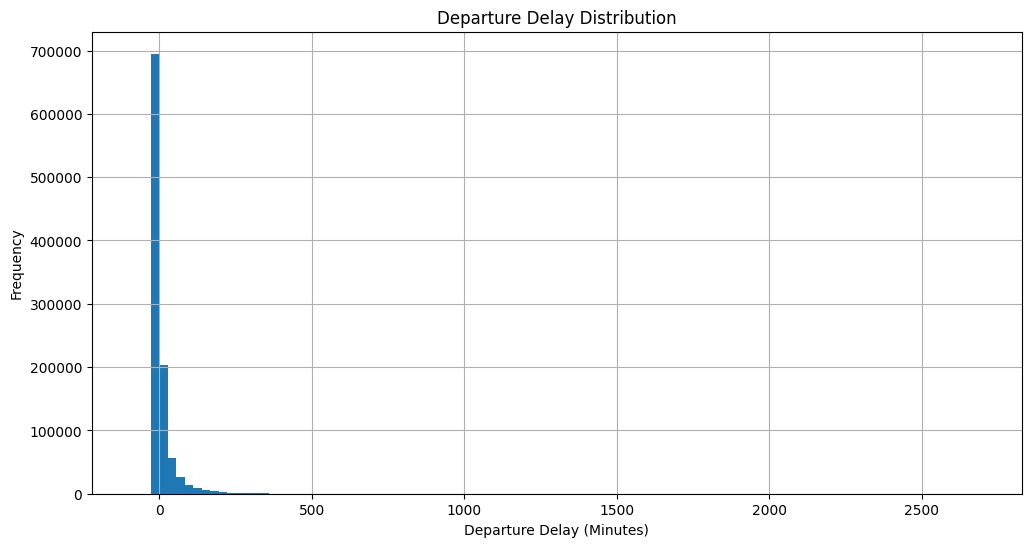

In [ ]:
# Try increasing the number of bins for better resolution
dtf['DEP_DELAY'].hist(bins=100, figsize=(12, 6))
plt.title("Departure Delay Distribution")
plt.xlabel("Departure Delay (Minutes)")
plt.ylabel("Frequency")
plt.show()

Showing that most of the flights are departing in time.

<Axes: xlabel='DEP_DELAY', ylabel='Density'>

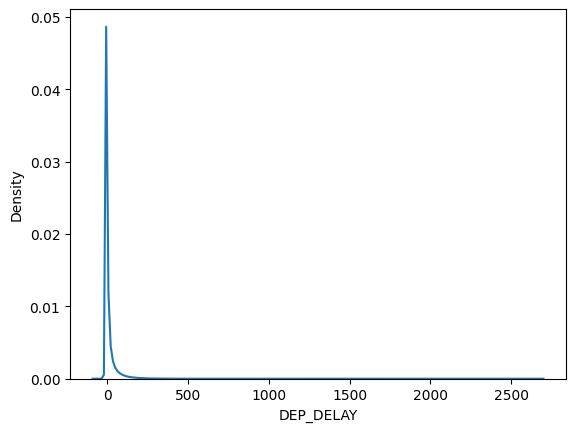

In [ ]:
sns.kdeplot(dtf.DEP_DELAY)

### 1) Explanation:
Here we can see the density of delays. Mostly, the delays are non-existant or small delays.

<Axes: xlabel='DEP_TIME', ylabel='DEP_DELAY'>

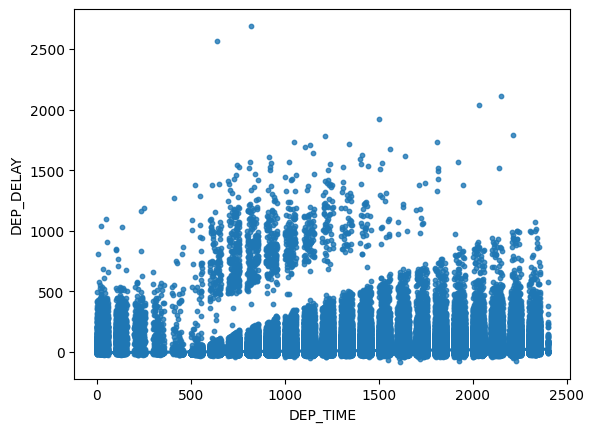

In [ ]:
sns.regplot(data=dtf,x='DEP_TIME',y='DEP_DELAY', scatter_kws={'s': 10})

### Explanation:
Check the correlation of departure time of day with the delay.
Maybe the delay depends on the time of day?
We can see that between 5 AM and around 14 PM there are many delays of significant time. During the early morning the delays are existant, but not as large. It can be assosiated with the density of people travelling during the day and amounts of services that are open in the airports.

In [ ]:
numeric_columns = dtf.select_dtypes(include=[np.number])

# Calculate the correlation matrix using only numeric columns
dtf_corr = numeric_columns.corr(method='pearson')

# Get the correlation of 'DEP_DELAY' with other columns
dtf_corr = dtf_corr.loc[['DEP_DELAY']]

<Axes: >

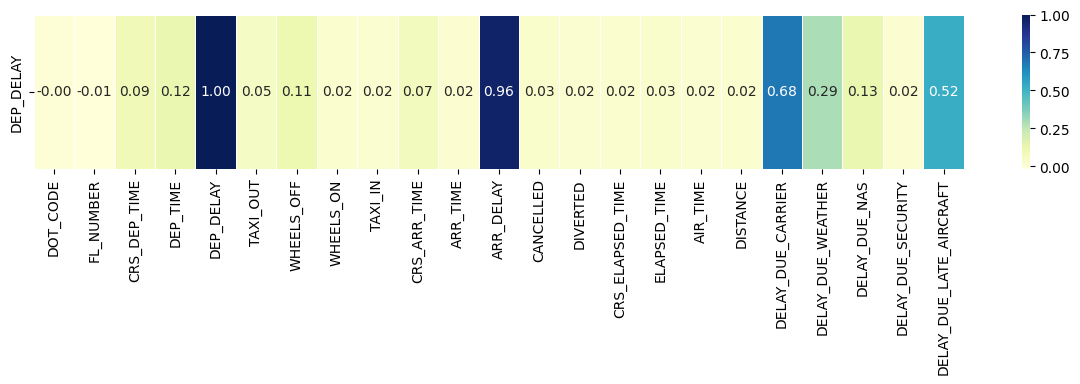

In [ ]:
fig, ax = plt.subplots(figsize=(15,2))

sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)

### Explanation:
Here we can see that for most of the parameters, there is no correlation. However, there's high correlation with Arrival Delay (ARR_DELAY), the Carrier (Company: DELAY_DUE_CARRIER) is mostly the reason for issues with departure delays, and somewhat correlation with delay because the aircraft is late in time (not the same as ARR_DELAY)

<Axes: xlabel='DOT_CODE', ylabel='DEP_DELAY'>

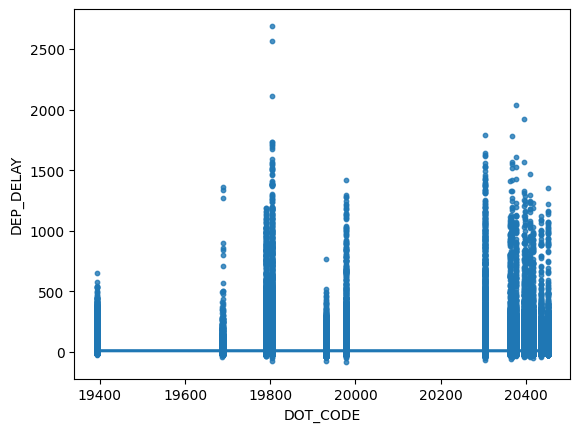

In [ ]:
sns.regplot(data=dtf,x='DOT_CODE',y='DEP_DELAY', scatter_kws={'s': 10})

### 2) Explanation:
Each company has it's own CODE, assigned by the Department of Transportation (DoT). Here we can see how many delays are for each company, and maybe find the most problematic ones.
Manual:
19977 = United Airlines
19790 = Delta

and so on...

<Axes: xlabel='DISTANCE', ylabel='DEP_DELAY'>

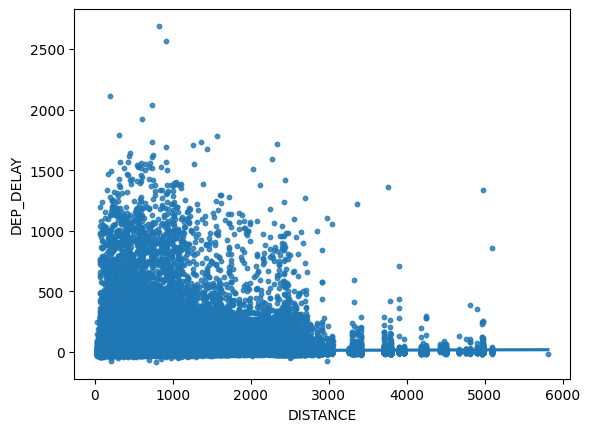

In [ ]:
sns.regplot(data=dtf,x='DISTANCE',y='DEP_DELAY', scatter_kws={'s': 10})

### 3) Explanation:
There's barely any correlation between distance and departure time. Distance requires more fuel and resources, therefore, it's possible to assume that there's no relation between amount of resources/distance to the delay in departure.
We see that there are not enough long distance flights (>=3000km) to know that there's a connection between long distance flights and delays. However, the delays of shorter distances are much more telling.

<Axes: xlabel='ARR_DELAY', ylabel='DEP_DELAY'>

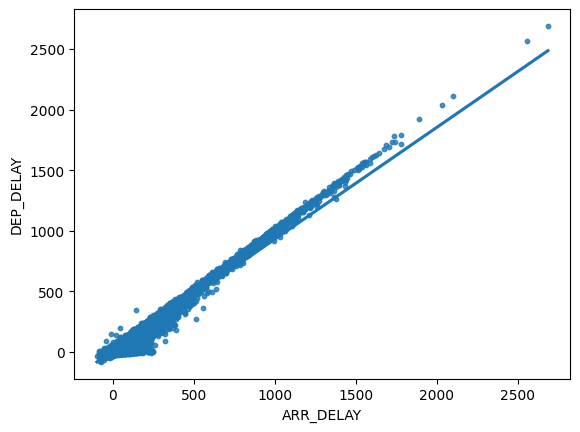

In [ ]:
sns.regplot(data=dtf,x='ARR_DELAY',y='DEP_DELAY', scatter_kws={'s': 10})

### 4) Explanation:
Check if department delay affects the arrival delay.
We can see a VERY HIGH correlation between those fields.

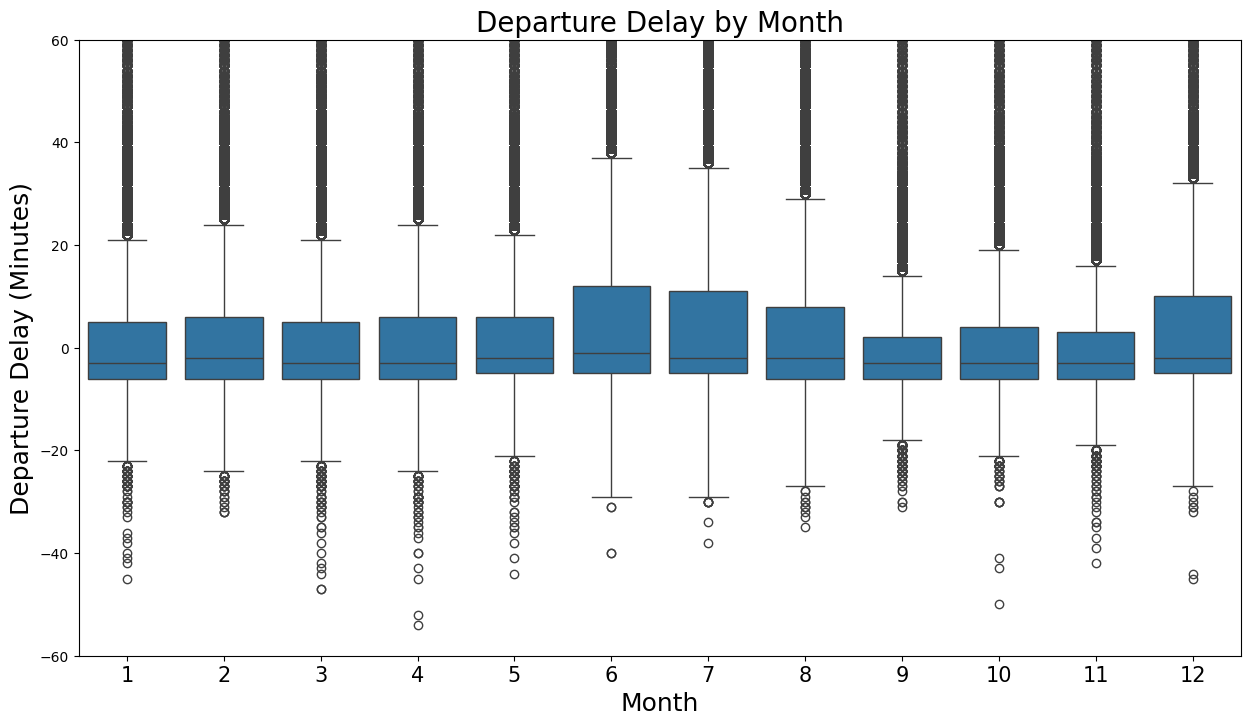

In [ ]:
# Convert FL_DATE to datetime format if it's not already
dtf['FL_DATE'] = pd.to_datetime(dtf['FL_DATE'])

# Extract the month from the FL_DATE column
dtf['Month'] = dtf['FL_DATE'].dt.month

# Create a boxplot to visualize DEP_DELAY by Month
plt.figure(figsize=(15, 8))
sns.boxplot(x='Month', y='DEP_DELAY', data=dtf)

# Title and labels with larger font size
plt.title("Departure Delay by Month", fontsize=20)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Departure Delay (Minutes)", fontsize=18)

# Set y-axis limits to zoom in
plt.ylim(-60, 60)  # You can adjust this range based on the data you want to focus on

# Increase the font size of the x-axis labels (Month)
plt.xticks(fontsize=15)

plt.show()


### 5) Explanation:
Here we divide the data according to each month. We can see that the 3rd quadrant on June is larger, meaning there are more delays of until 10 minutes, but in September-November the delays are less appearant.
For most of the years the delays are bearable (up to 25 minutes or so), however, in June, July, August and December the delays are more prevalent.
We can associate those with the yearly holidays - Christmas and the Summar vacation, when the airports are usually more crowded.

# Next part is in the python file
